주어진 데이터를 이용하여 회귀 분석 프로그램을 작성하고 
이름.ipynb화일을 제출하시오.

1. 사상자 수가 종속변수이고 나머지가 독립변수 입니다.
     (날짜는 사용하지 않습니다.) 
2. 8:2로 훈련데이터 테스트 데이터를 나누세요. 
3. 테스트 데이터에 대한 R2값을 출력하면 됩니다. 
    (성능에 너무 집착하지 않아도 됩니다. )

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('traffic_clean_utf.csv')
df = df.drop(columns='날짜')
df

,기온,강수량,풍속,습도,일조,적설,지면온도,사상자
0,2.395833,0.000000,1.575000,75.833333,0.070833,0.000000,0.925000,4
1,5.241667,0.030000,2.220833,76.875000,0.112500,0.000000,5.075000,16
2,2.108333,0.000000,1.908333,62.416667,0.370833,0.000000,1.533333,2
3,4.037500,0.000000,1.708333,58.083333,0.358333,0.000000,3.229167,2
4,3.600000,0.000000,3.058333,52.041667,0.000000,0.000000,1.875000,2
...,...,...,...,...,...,...,...,...
359,-4.358333,0.000000,2.954167,39.041667,0.358333,0.000000,-3.004167,0
360,-6.658333,0.000000,1.991667,30.958333,0.370833,0.000000,-4.254167,0
361,-1.441667,0.000000,1.162500,49.500000,0.137500,0.000000,-0.837500,0
362,2.008333,0.000000,1.195833,68.333333,0.170833,0.000000,0.045833,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기온      364 non-null    float64
 1   강수량     364 non-null    float64
 2   풍속      364 non-null    float64
 3   습도      364 non-null    float64
 4   일조      364 non-null    float64
 5   적설      364 non-null    float64
 6   지면온도    364 non-null    float64
 7   사상자     364 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 22.9 KB


In [4]:
df.describe()

,기온,강수량,풍속,습도,일조,적설,지면온도,사상자
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,13.090401,0.345160,2.211361,57.777881,0.299141,0.101022,14.878354,0.802198
std,10.957455,1.153717,0.681061,14.456319,0.167892,0.517865,11.775967,2.064896
min,-9.287500,0.000000,0.858333,18.291667,0.000000,0.000000,-6.237500,0.000000
25%,2.931250,0.000000,1.757292,46.687500,0.141667,0.000000,2.858333,0.000000
50%,15.281250,0.000000,2.118750,57.208333,0.356250,0.000000,16.383333,0.000000
75%,22.608333,0.100000,2.585417,67.312500,0.429167,0.000000,25.879167,0.000000
max,31.333333,12.136364,4.245833,96.333333,0.570833,4.604167,34.495833,16.000000


In [5]:
df.iloc[:, -1:]

,사상자
0,4
1,16
2,2
3,2
4,2
...,...
359,0
360,0
361,0
362,0


In [6]:
data = df[['기온', '강수량', '풍속', '습도', '일조', '적설', '지면온도']]
target = df[['사상자']]

In [7]:
# 데이터 split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(291, 7)
(73, 7)
(291, 1)
(73, 1)


## KNN

In [8]:
for n in [10, 13, 15, 17, 20]:
    knr = KNeighborsRegressor(n_neighbors=n)
    knr.fit(X_train, y_train)
    score = knr.score(X_test, y_test)
    print(f"k={n} : {score}")
    

k=10 : -0.09083650190114056
k=13 : -0.054541685281667585
k=15 : -0.0590705534431768
k=17 : -0.05967166557967385
k=20 : -0.028557509505703127


## LinearRegression

### Polynomial Features 적용 전

In [9]:
# polynomical 적용 전
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
print(lr2.score(X_test, y_test)) 

-0.16207889729905944


In [10]:
print(lr2.coef_, lr2.intercept_)

[[ 0.09512167 -0.10819024  0.08893587  0.00162969 -0.04248922  1.0025278
  -0.07815815]] [0.41317411]


### Polynomial Features 적용

In [11]:
# degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
train_poly = poly.fit_transform(X_train)
test_poly = poly.fit_transform(X_test)
print(train_poly.shape)

(291, 35)


In [12]:
poly.get_feature_names_out()

array(['기온', '강수량', '풍속', '습도', '일조', '적설', '지면온도', '기온^2', '기온 강수량',
       '기온 풍속', '기온 습도', '기온 일조', '기온 적설', '기온 지면온도', '강수량^2', '강수량 풍속',
       '강수량 습도', '강수량 일조', '강수량 적설', '강수량 지면온도', '풍속^2', '풍속 습도', '풍속 일조',
       '풍속 적설', '풍속 지면온도', '습도^2', '습도 일조', '습도 적설', '습도 지면온도', '일조^2',
       '일조 적설', '일조 지면온도', '적설^2', '적설 지면온도', '지면온도^2'], dtype=object)

In [13]:
# polynomial 적용 후
lr_polynomial = LinearRegression()
lr_polynomial.fit(train_poly, y_train)
print(lr_polynomial.score(test_poly, y_test)) 

-0.34938817842773107


In [14]:
prediction = lr_polynomial.predict(train_poly)

In [15]:
print(lr_polynomial.coef_, lr_polynomial.intercept_)

[[ 8.90321687e-01 -9.31382768e-02  2.39260066e+00 -2.11472667e-01
  -1.65290723e+00 -8.59761252e+00 -6.71185248e-01 -9.72862662e-02
   1.78195032e-02 -6.85823758e-02 -3.15948855e-03 -1.69612226e+00
   2.60222960e-01  1.81303455e-01  4.44887479e-02  2.01101749e-01
  -1.68659148e-02 -6.29632396e-01 -5.11254679e-02  6.17400351e-03
  -5.64253263e-01  8.74702006e-03  6.85765137e-01  1.31975387e+00
   4.87988871e-02  1.93824290e-03  1.24715791e-01  5.21093693e-02
  -7.98875703e-04 -1.28895453e+01  4.51117670e+00  1.54120853e+00
  -6.20958722e-02 -1.21983509e+00 -8.07715386e-02]] [3.00819629]


In [16]:
# degree 5
poly = PolynomialFeatures(degree=5, include_bias=False)

train_poly = poly.fit_transform(X_train)
test_poly = poly.transform(X_test)

In [17]:
# polynomial 적용 후
lr_polynomial_5 = LinearRegression()
lr_polynomial_5.fit(train_poly, y_train)
print(lr_polynomial_5.score(test_poly, y_test)) 

-4078007483.0769057


In [18]:
print(lr_polynomial.coef_)

[[ 8.90321687e-01 -9.31382768e-02  2.39260066e+00 -2.11472667e-01
  -1.65290723e+00 -8.59761252e+00 -6.71185248e-01 -9.72862662e-02
   1.78195032e-02 -6.85823758e-02 -3.15948855e-03 -1.69612226e+00
   2.60222960e-01  1.81303455e-01  4.44887479e-02  2.01101749e-01
  -1.68659148e-02 -6.29632396e-01 -5.11254679e-02  6.17400351e-03
  -5.64253263e-01  8.74702006e-03  6.85765137e-01  1.31975387e+00
   4.87988871e-02  1.93824290e-03  1.24715791e-01  5.21093693e-02
  -7.98875703e-04 -1.28895453e+01  4.51117670e+00  1.54120853e+00
  -6.20958722e-02 -1.21983509e+00 -8.07715386e-02]]


## Standard Scaler

In [19]:
ss = StandardScaler()
train_scaled = ss.fit_transform(train_poly)
test_scaled = ss.fit_transform(test_poly)

In [20]:
# polynomical 적용 전
lr2 = LinearRegression()
lr2.fit(train_scaled, y_train)
print(lr2.score(test_scaled, y_test)) 

-14213597.097447319


In [21]:
ss2 = StandardScaler()
train_scaled2 = ss.fit_transform(X_train)
test_scaled2 = ss.fit_transform(X_test)

In [22]:
# positive 적용
lr2 = LinearRegression(positive=True)
lr2.fit(train_scaled2, y_train)
print(lr2.score(test_scaled2, y_test)) 

-0.13261293404915264


## Ridge

In [23]:
ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))

0.4212458423853229


In [24]:
print(ridge.score(test_scaled, y_test))

-4.302032265910188


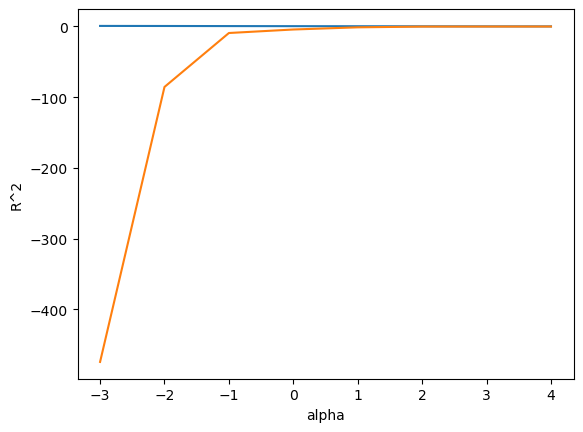

In [25]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, y_train)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [26]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, y_train)

print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.5332049052881717
-9.259723739743903


## Lasso

In [27]:
lasso = Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))

0.0


In [28]:
print(lasso.score(test_scaled, y_test))


-0.007785117012710785


In [29]:
train_score = []
test_score = []

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(train_scaled, y_train)
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))

/Users/syshin/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.041e+02, tolerance: 1.345e-01
  model = cd_fast.enet_coordinate_descent(
/Users/syshin/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.703e+00, tolerance: 1.345e-01
  model = cd_fast.enet_coordinate_descent(


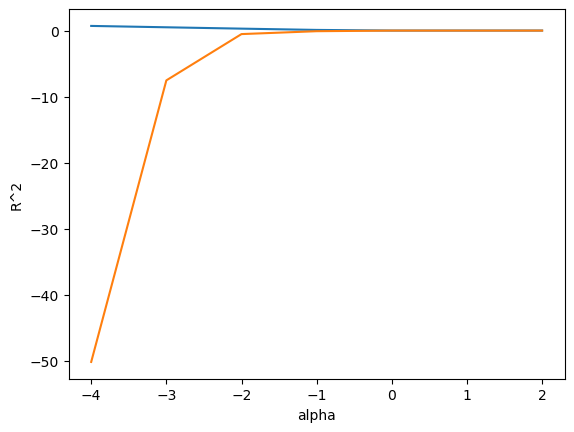

In [30]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [31]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, y_train)

print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.0
-0.007785117012710785
